In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv("data.csv",encoding= 'unicode_escape')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(49912, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49912 entries, 0 to 49911
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    49912 non-null  object 
 1   StockCode    49912 non-null  object 
 2   Description  49770 non-null  object 
 3   Quantity     49912 non-null  int64  
 4   InvoiceDate  49912 non-null  object 
 5   UnitPrice    49911 non-null  float64
 6   CustomerID   32030 non-null  float64
 7   Country      49911 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.0+ MB


In [6]:
data.isnull().sum().sort_values(ascending=False)

CustomerID     17882
Description      142
UnitPrice          1
Country            1
InvoiceNo          0
StockCode          0
Quantity           0
InvoiceDate        0
dtype: int64

In [7]:
# Dropping the missing value in customerId .
data.dropna(axis = 0, inplace=True)

In [8]:
data.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Quantity,32030.000000,11.340899,68.316025,-9360.000000,2.000000,4.000000,12.000000,2880.000000
UnitPrice,32030.000000,3.222959,8.501477,0.000000,1.250000,2.100000,3.750000,1126.000000
CustomerID,32030.000000,15426.016422,1752.300279,12347.000000,14057.000000,15464.000000,17041.000000,18283.000000


In [9]:
data[(data["Quantity"] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
49856,C540535,85023B,EAU DE NILE JEWELLED PHOTOFRAME,-1,1/9/2011 14:17,2.55,15005.0,United Kingdom
49857,C540535,21232,STRAWBERRY CERAMIC TRINKET BOX,-1,1/9/2011 14:17,1.25,15005.0,United Kingdom
49858,C540535,21232,STRAWBERRY CERAMIC TRINKET BOX,-1,1/9/2011 14:17,1.25,15005.0,United Kingdom
49859,C540535,20681,PINK POLKADOT CHILDRENS UMBRELLA,-1,1/9/2011 14:17,3.25,15005.0,United Kingdom


In [10]:
data = data[(data["Quantity"] > 0)]

In [11]:
data.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Quantity,31150.000000,12.224109,44.097127,1.000000,2.000000,4.000000,12.000000,2880.000000
UnitPrice,31150.000000,3.117403,4.975915,0.000000,1.250000,2.100000,3.750000,295.000000
CustomerID,31150.000000,15436.941573,1754.013304,12347.000000,14062.000000,15464.000000,17059.000000,18283.000000


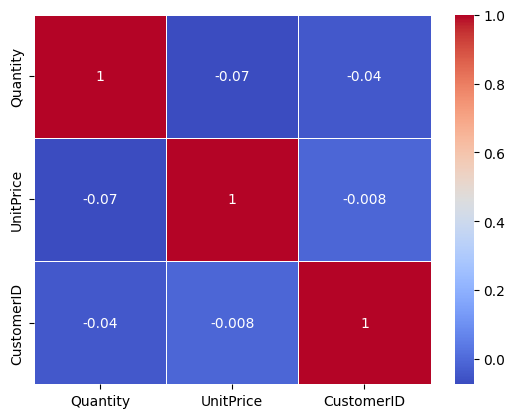

In [12]:
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm')
plt.show()

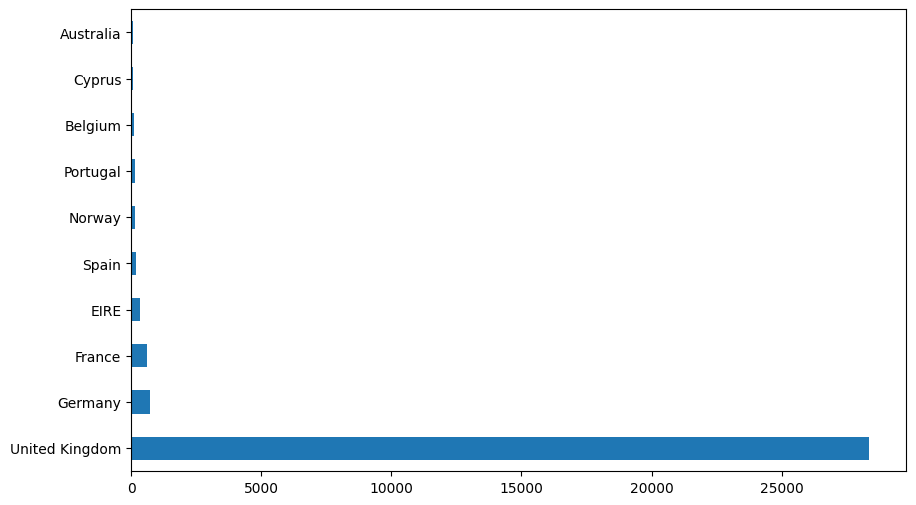

In [13]:
plt.figure(figsize=(10,6))
data['Country'].value_counts()[0:10].sort_values(ascending=False).plot(kind='barh')
plt.show()

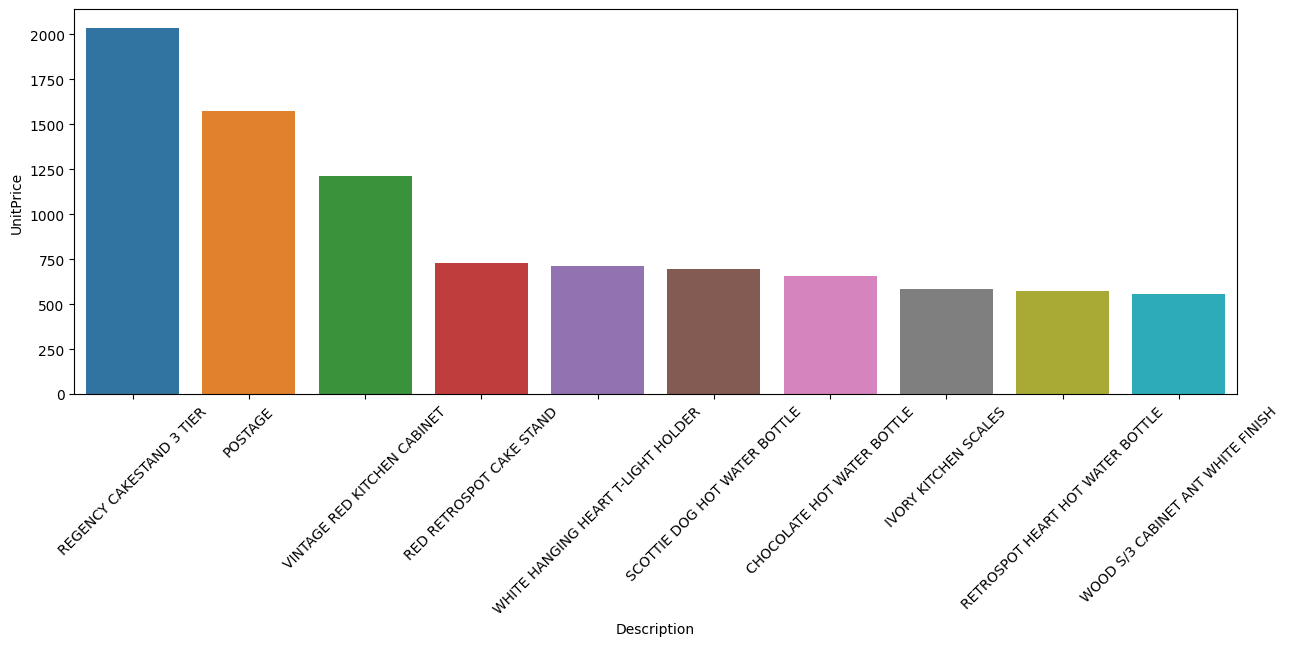

In [14]:
tp = data.groupby('Description',as_index=False)['Quantity','UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(data=tp[0:10], x='Description', y='UnitPrice')
plt.xticks(rotation=45)
plt.show()

In [15]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])    # first convert object column into datetime column
from datetime import  datetime as dt

data['day'] = data['InvoiceDate'].dt.day_name()
data['month'] = data['InvoiceDate'].dt.month_name()
data['weekday'] = data['InvoiceDate'].dt.weekday 
data['year'] = data['InvoiceDate'].dt.year
data['order_month_year'] = data['InvoiceDate'].dt.to_period('M')

data['Hour'] = (data['InvoiceDate']).dt.hour   # extract hour

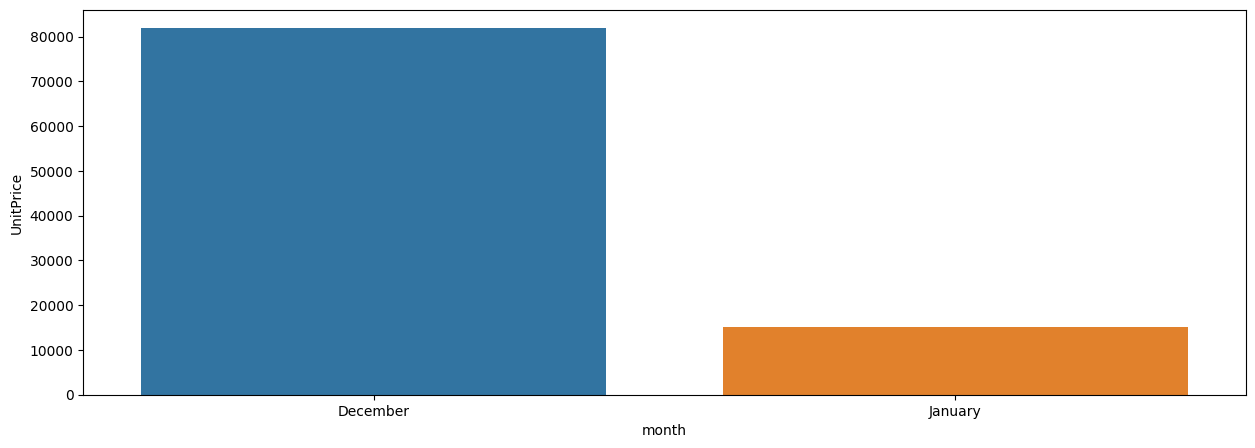

In [16]:
m = data.groupby('month',as_index=False)['Quantity','UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(data=m, x='month',y='UnitPrice')
plt.show()

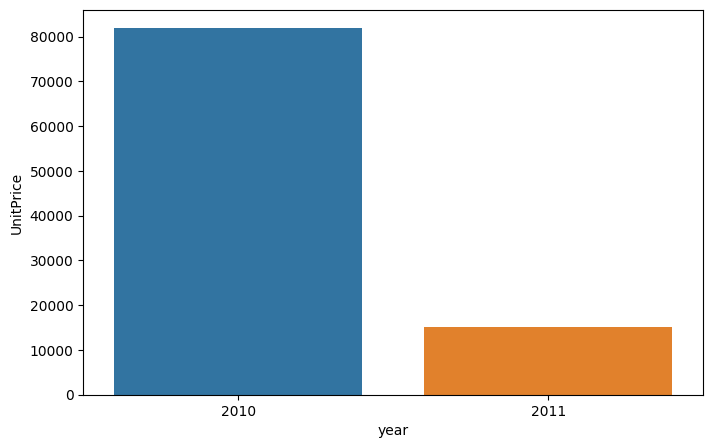

In [17]:
y = data.groupby('year',as_index=False)['Quantity','UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(data=y, x='year',y='UnitPrice')
plt.show()

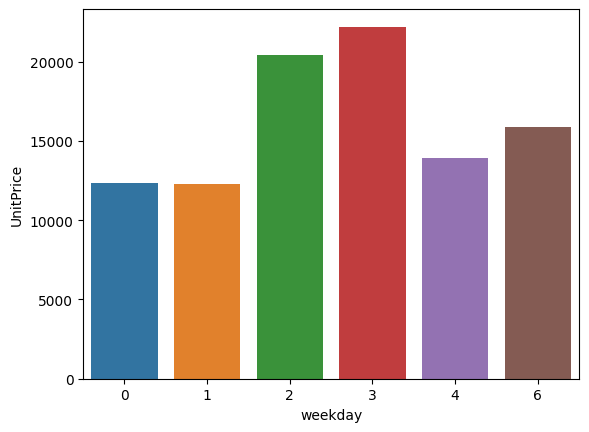

In [18]:
w = data.groupby('weekday',as_index=False)['Quantity','UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False)
sns.barplot(data=w, x='weekday',y='UnitPrice')
plt.show()

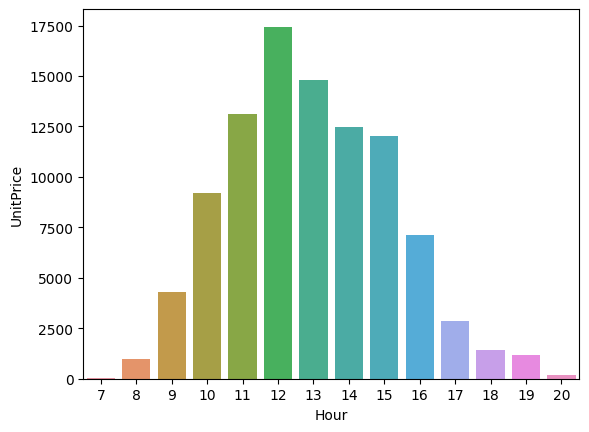

In [19]:
h = data.groupby('Hour',as_index=False)['Quantity','UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False)
sns.barplot(data=h, x='Hour',y='UnitPrice')
plt.show()

In [20]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])    # first convert object column into datetime column

In [21]:
df = data[['CustomerID','InvoiceDate','Quantity','UnitPrice']]

In [22]:
df.head()

,CustomerID,InvoiceDate,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,6,2.55
1,17850.0,2010-12-01 08:26:00,6,3.39
2,17850.0,2010-12-01 08:26:00,8,2.75
3,17850.0,2010-12-01 08:26:00,6,3.39
4,17850.0,2010-12-01 08:26:00,6,3.39


In [23]:
# Recency
df['InvoiceDate'].max()  

Timestamp('2011-01-09 14:36:00')

In [24]:
from datetime import datetime
present = datetime(2011,12,10)

In [25]:
# Monetary
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [26]:
seg = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (present - date.max()).days,
                                        'CustomerID': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [27]:
seg.columns=['recency', 'frequency','monetary']

In [28]:
seg.head()

,recency,frequency,monetary
CustomerID,,,
12347.0,367,31,711.79
12348.0,358,17,892.80
12370.0,357,91,1868.02
12377.0,354,43,1001.52
12383.0,352,37,600.72


In [29]:
(present - datetime(2011,9,25)).days==76   

True

In [30]:
quantiles = seg.quantile(q=[0,0.25,0.5,0.75,1])

In [31]:
quantiles

,recency,frequency,monetary
0.00,334.0,1.0,12.4500
0.25,354.0,10.0,203.2500
0.50,360.0,19.0,341.2100
0.75,367.0,39.0,657.1425
1.00,373.0,682.0,27834.6100


In [32]:
seg['r_value'] = pd.qcut(seg['recency'], 4, ['1','2','3','4'])
seg['f_value'] = pd.qcut(seg['frequency'], 4, ['4','3','2','1'])
seg['m_value'] = pd.qcut(seg['monetary'], 4, ['4','3','2','1'])

In [33]:
seg['RFM'] = seg['r_value'].astype(str) + seg['f_value'].astype(str) + seg['m_value'].astype(str)

In [34]:
seg['RFM_Total'] = seg['r_value'].astype(int) + seg['f_value'].astype(int) + seg['m_value'].astype(int)

In [35]:
seg.head()

,recency,frequency,monetary,r_value,f_value,m_value,RFM,RFM_Total
CustomerID,,,,,,,,
12347.0,367,31,711.79,3,2,1,321,6
12348.0,358,17,892.80,2,3,1,231,6
12370.0,357,91,1868.02,2,1,1,211,4
12377.0,354,43,1001.52,1,1,1,111,3
12383.0,352,37,600.72,1,2,2,122,5


In [36]:
display(seg['RFM'].unique())
print(seg['RFM'].nunique())

array(['321', '231', '211', '111', '122', '142', '221', '233', '133',
       '443', '311', '334', '411', '344', '132', '244', '442', '214',
       '243', '144', '433', '222', '143', '444', '434', '322', '212',
       '422', '331', '123', '341', '333', '412', '343', '234', '232',
       '141', '332', '241', '432', '121', '342', '324', '131', '323',
       '242', '421', '134', '223', '124', '112', '413', '431', '423',
       '314', '424', '224', '414', '313', '312', '441', '113', '213',
       '114'], dtype=object)

64


In [37]:
seg['RFM_Total'].unique()

array([ 6,  4,  3,  5,  7,  8, 11, 10,  9, 12])

In [38]:
def classify_customer(df):
    if (df['RFM_Total'] == 3):
        return 'Top customers'   
    elif (df['RFM_Total'] == 4):
        return 'Best customers'
    elif (df['RFM_Total'] == 5):
            return "Good customers"
    elif (df['RFM_Total'] == 6):
            return "Promising customer"
    elif (df['RFM_Total'] == 7):
            return "Recent customer"
    elif (df['RFM_Total'] == 8):
            return "Customer needs attention"
    elif (df['RFM_Total'] == 9):
            return "Can't lose them"
    elif (df['RFM_Total'] == 10):
            return "Don't lose them" 
    elif (df['RFM_Total'] == 11):
            return "We lose them"    
    else:
        return "lost"

In [39]:
seg['Customer_Segmentation'] = seg.apply(classify_customer,axis=1)

In [40]:
seg.sample(5)

,recency,frequency,monetary,r_value,f_value,m_value,RFM,RFM_Total,Customer_Segmentation
CustomerID,,,,,,,,,
14243.0,357,19,472.00,2,3,2,232,7,Recent customer
17340.0,354,136,4360.39,1,1,1,111,3,Top customers
13523.0,366,30,566.95,3,2,2,322,7,Recent customer
18062.0,337,5,169.80,1,4,4,144,9,Can't lose them
14415.0,360,88,875.18,2,1,1,211,4,Best customers


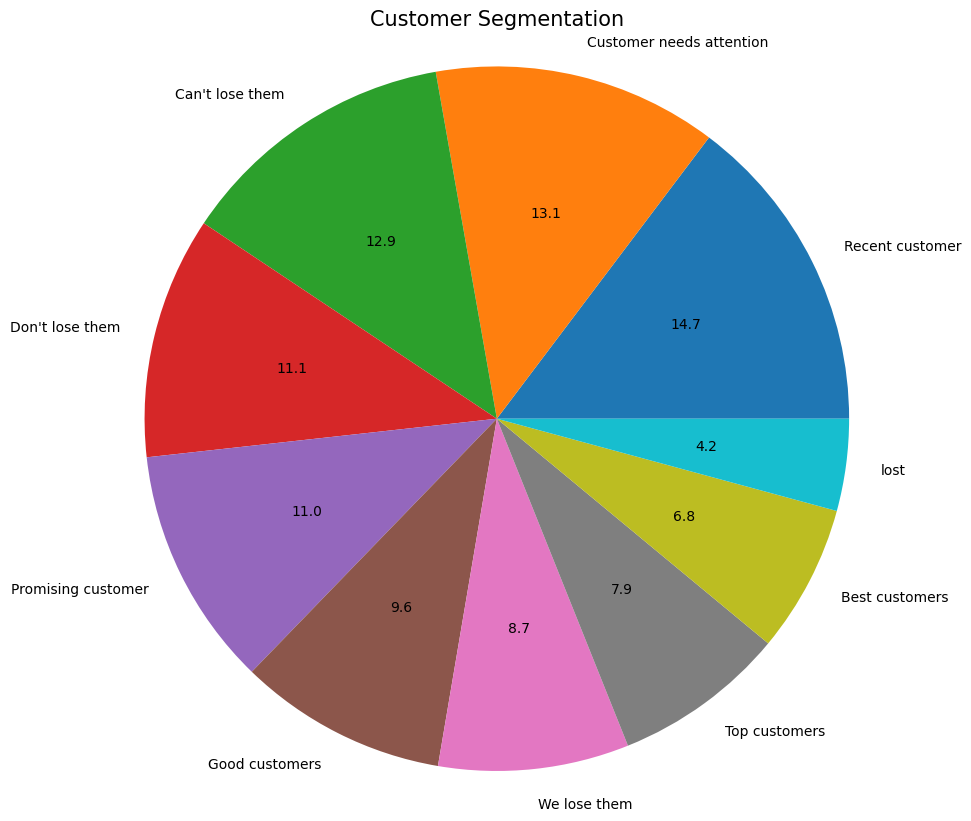

In [41]:
plt.figure(figsize=(10,10))
seg['Customer_Segmentation'].value_counts().plot(kind='pie',autopct='%.1f')
plt.title("Customer Segmentation",size=15)
plt.ylabel(" ")
plt.axis('equal') 
plt.show()

In [42]:
seg[seg['RFM'] == '111'].sort_values('monetary',ascending=False).head()

,recency,frequency,monetary,r_value,f_value,m_value,RFM,RFM_Total,Customer_Segmentation
CustomerID,,,,,,,,,
17511.0,338,122,10573.22,1,1,1,111,3,Top customers
14646.0,353,70,8591.88,1,1,1,111,3,Top customers
13089.0,337,159,7738.67,1,1,1,111,3,Top customers
14911.0,351,292,7737.94,1,1,1,111,3,Top customers
12415.0,337,46,7011.38,1,1,1,111,3,Top customers
